In [2]:
# Allow the visualization to be 3D manipulated.
#%matplotlib widget

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
heartFailure = pd.read_csv("heartFailure.csv")

In [4]:
heartFailure.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [5]:
columns = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT']

In [6]:
heartFailure.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [7]:
heartFailure.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

<AxesSubplot:>

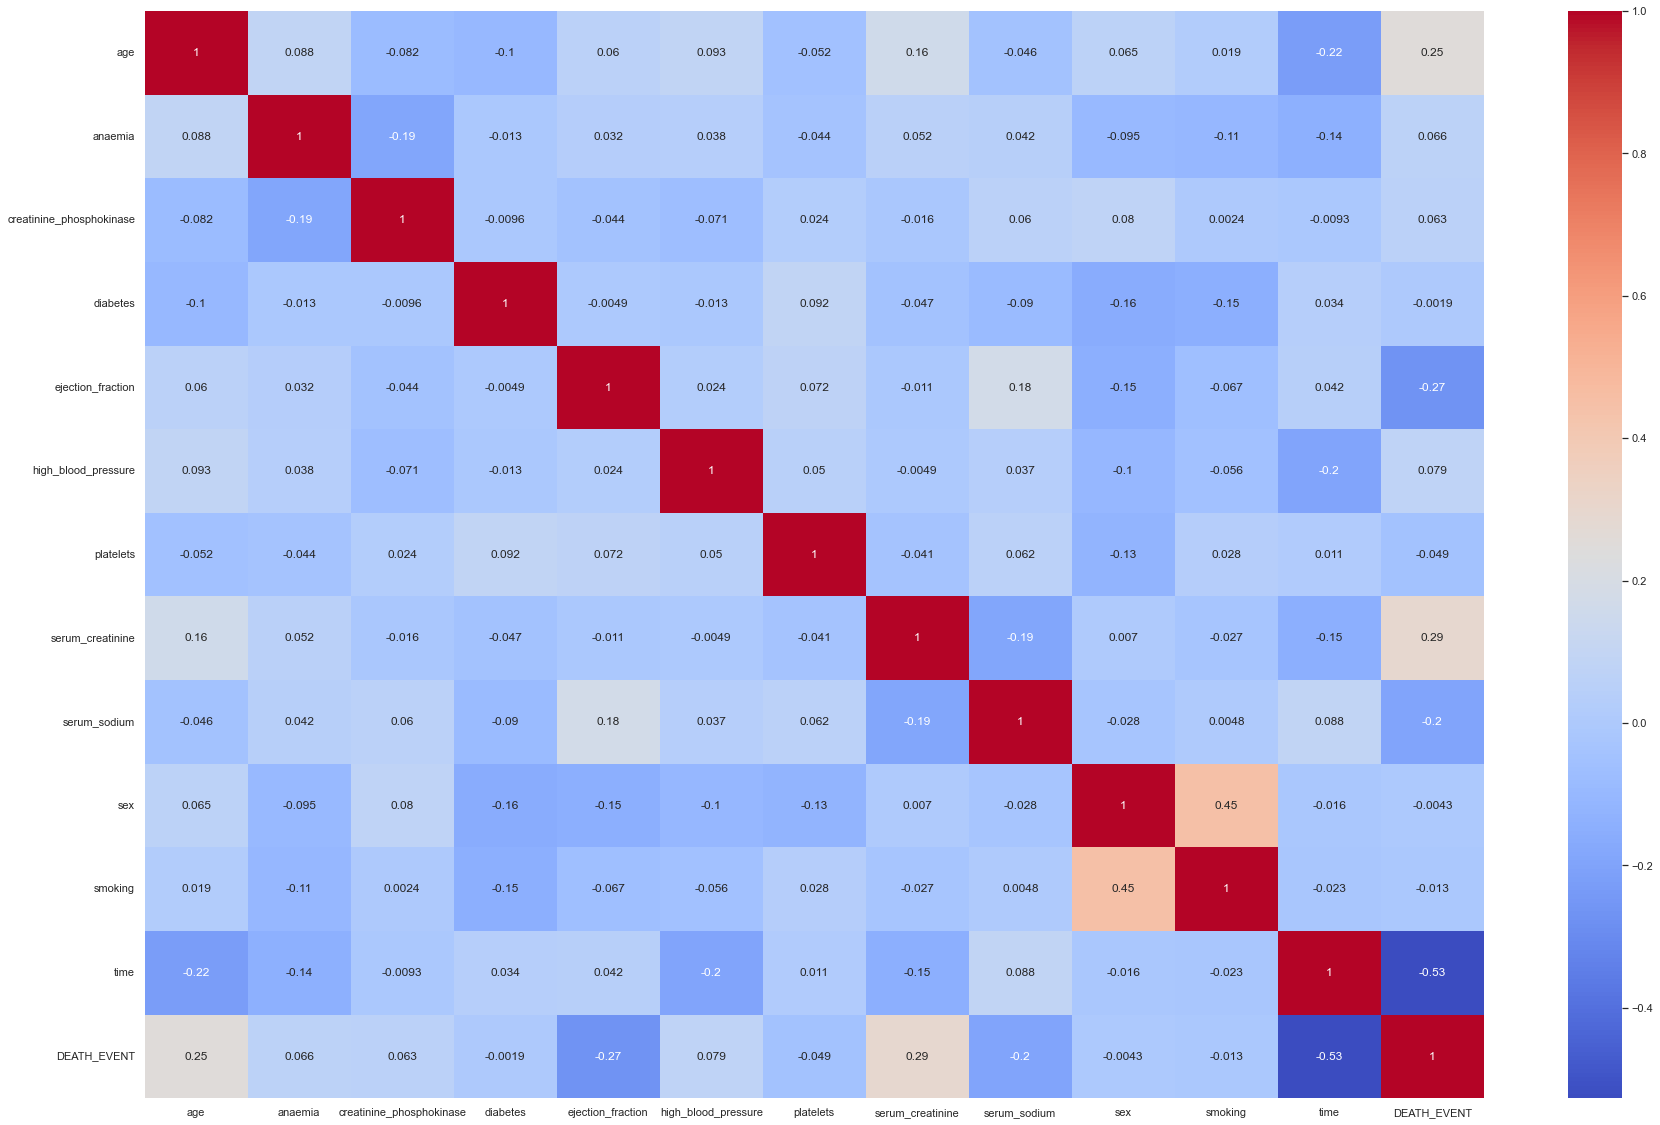

In [18]:
sns.heatmap(heartFailure.corr(), annot = True, cmap = 'coolwarm')

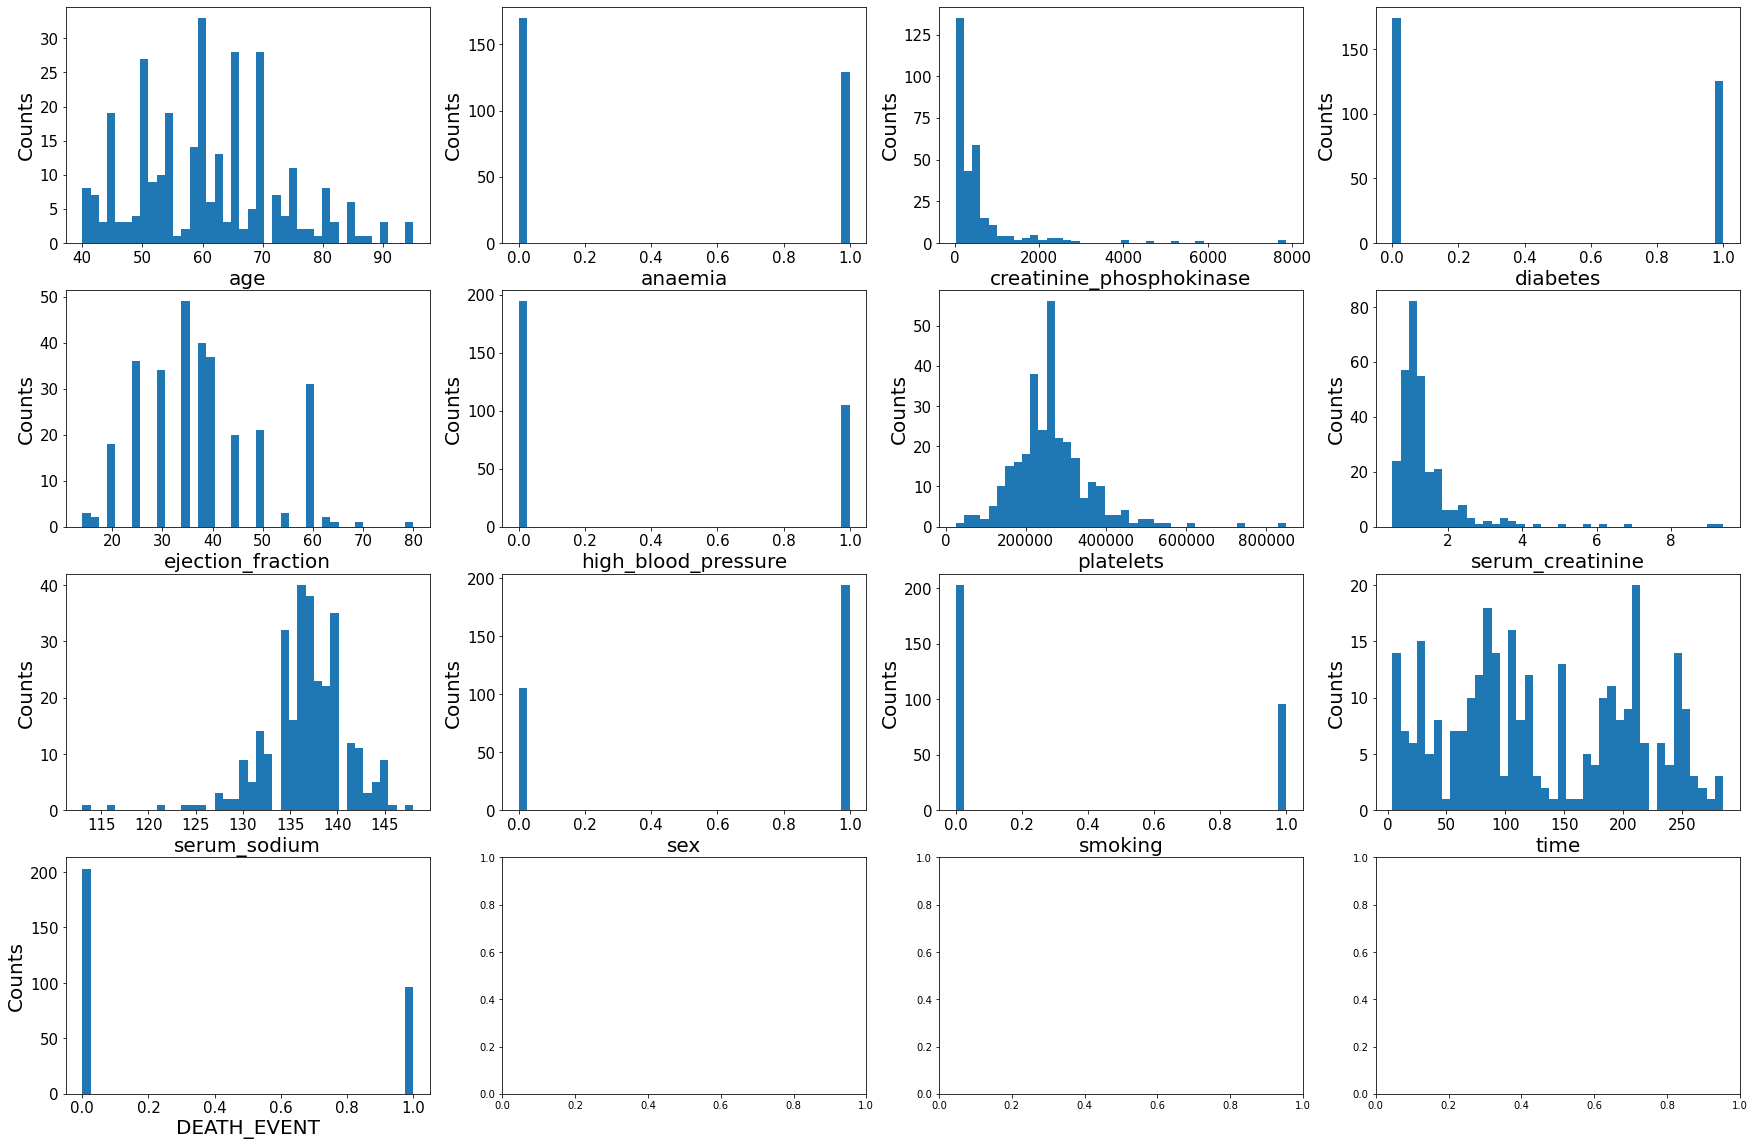

In [10]:
plt.rcParams['figure.figsize'] = (30, 20)

# make subplots
fig, axes = plt.subplots(nrows = 4, ncols = 4)

axes = axes.ravel()
for idx, ax in enumerate(axes):
    if(idx < len(columns)):
        ax.hist(heartFailure[columns[idx]].dropna(), bins=40)
        ax.set_xlabel(columns[idx], fontsize=20)
        ax.set_ylabel("Counts", fontsize=20)
        ax.tick_params(axis='both', labelsize=15)

<AxesSubplot:>

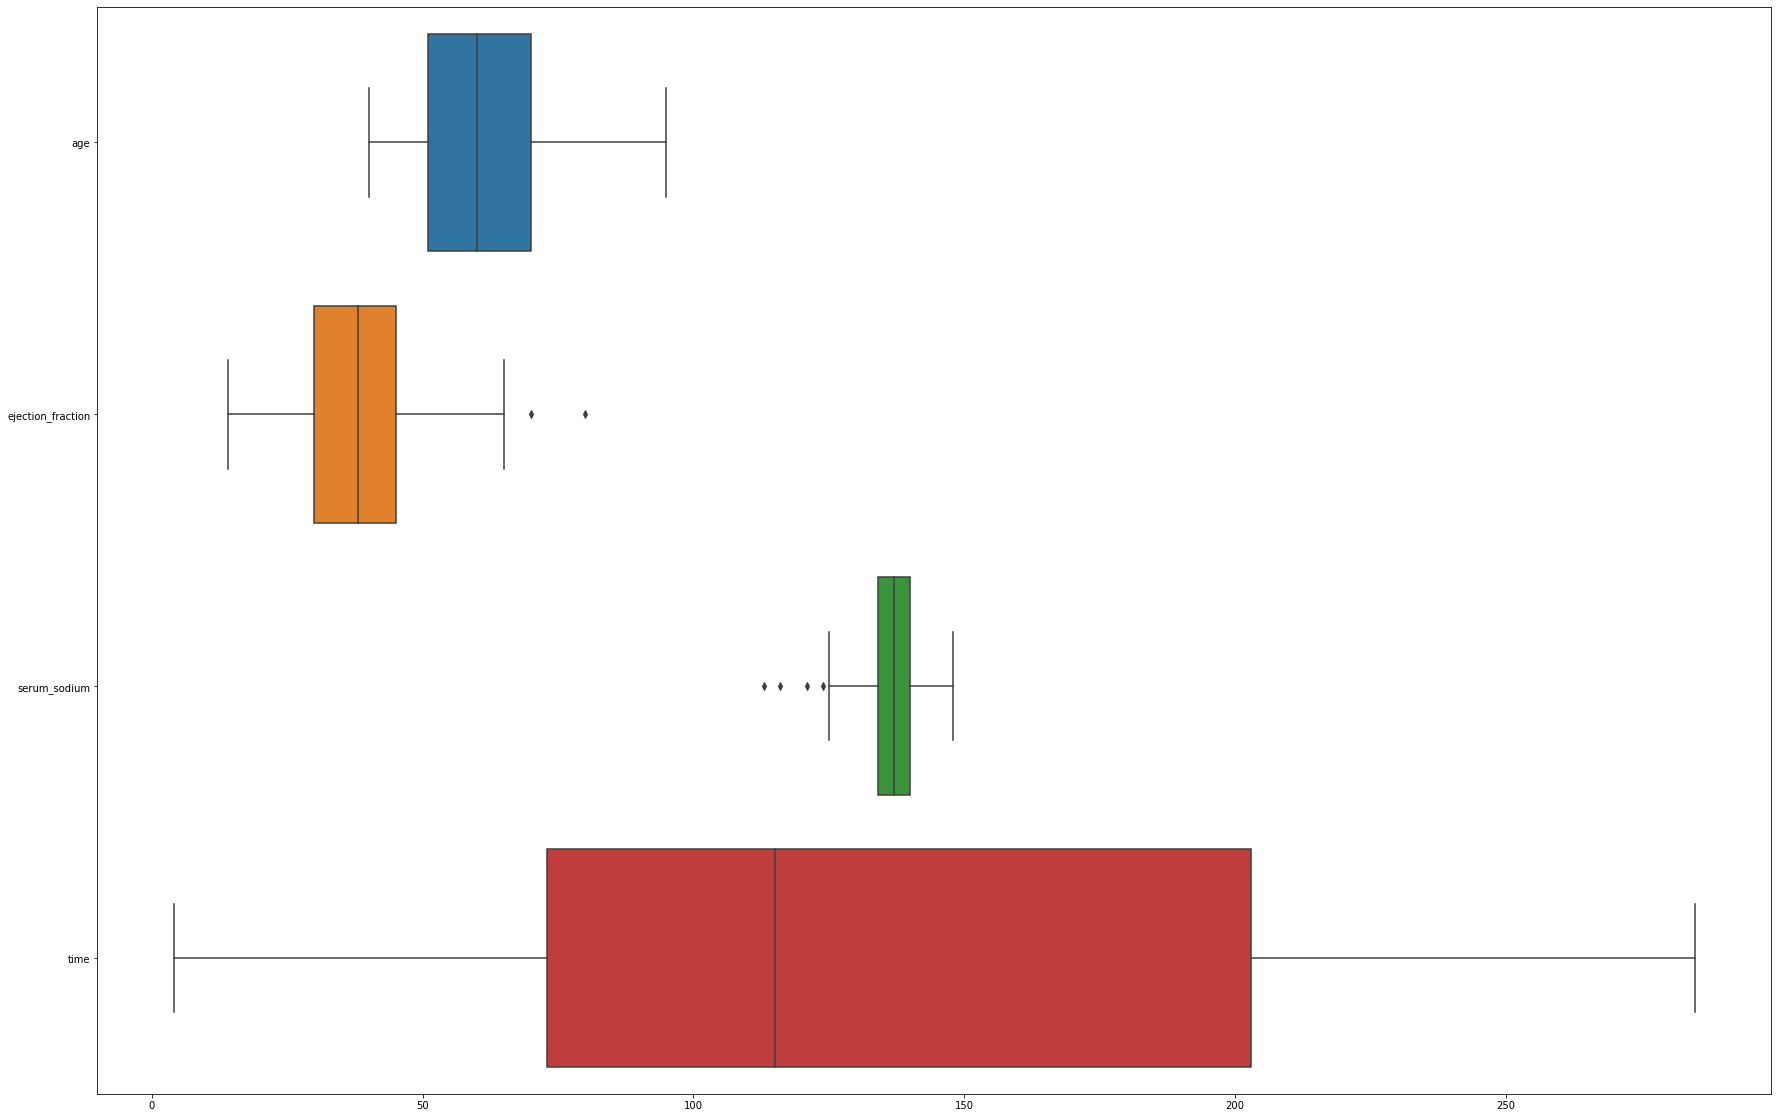

In [11]:
#### TESTING CHANGES FROM CONTINUOUS VALUE ####
columns = ['age','ejection_fraction', 'serum_sodium', 'time']

import seaborn as sns

sns.boxplot(data=heartFailure[columns], orient='h')

In [8]:
Alive = heartFailure[heartFailure['DEATH_EVENT'] == 0]
Death = heartFailure[heartFailure['DEATH_EVENT'] == 1]

In [9]:
print(Alive[Alive['sex'] == 1]['age'].count())
print(Death[Death['sex'] == 1]['age'].count())

132
62


In [65]:
print(Alive[Alive['sex'] == 0]['age'].count())
print(Death[Death['sex'] == 0]['age'].count())

71
34


<BarContainer object of 1 artists>

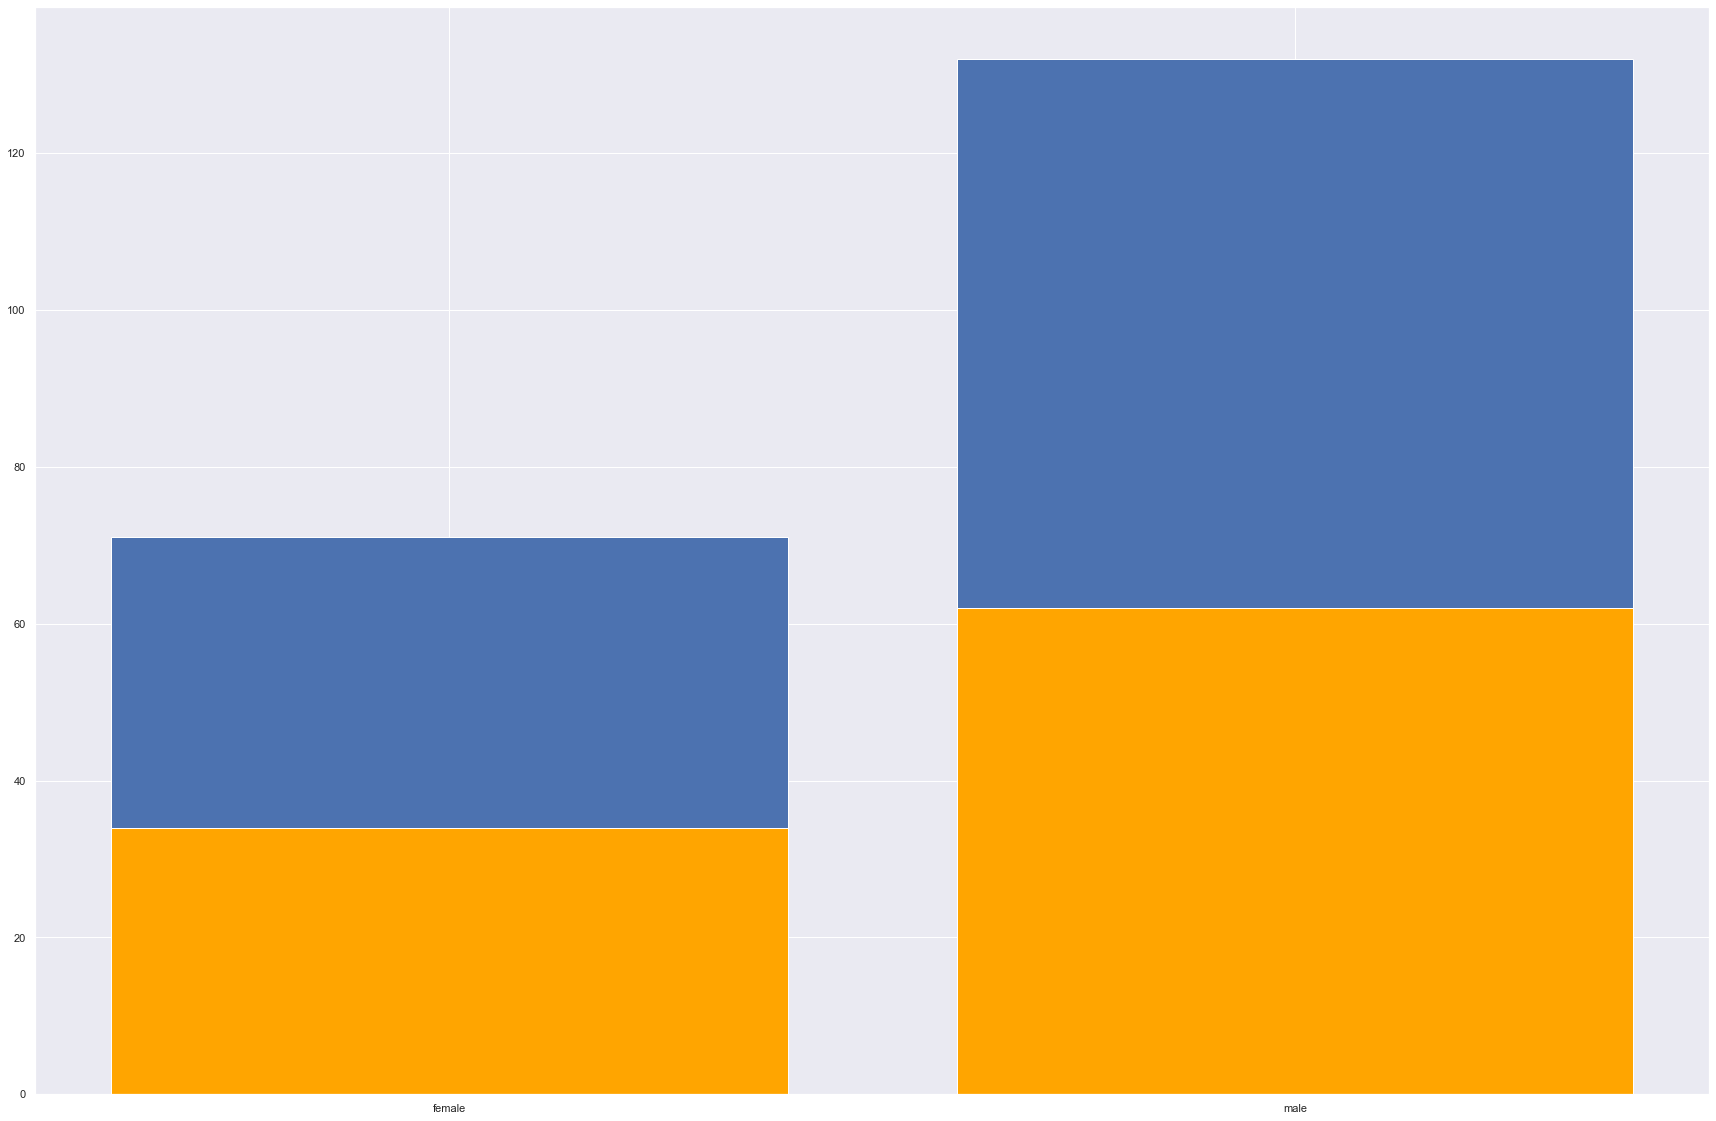

In [66]:
plt.bar("female", Alive[Alive['sex'] == 0]['age'].count(), color = 'b')
plt.bar("female", Death[Death['sex'] == 0]['age'].count(), color ='orange')
plt.bar("male", Alive[Alive['sex'] == 1]['age'].count())
plt.bar("male", Death[Death['sex'] == 1]['age'].count(), color ='orange')

In [14]:
print(len(Alive['DEATH_EVENT']))
print(len(Alive['ejection_fraction']))

203
203


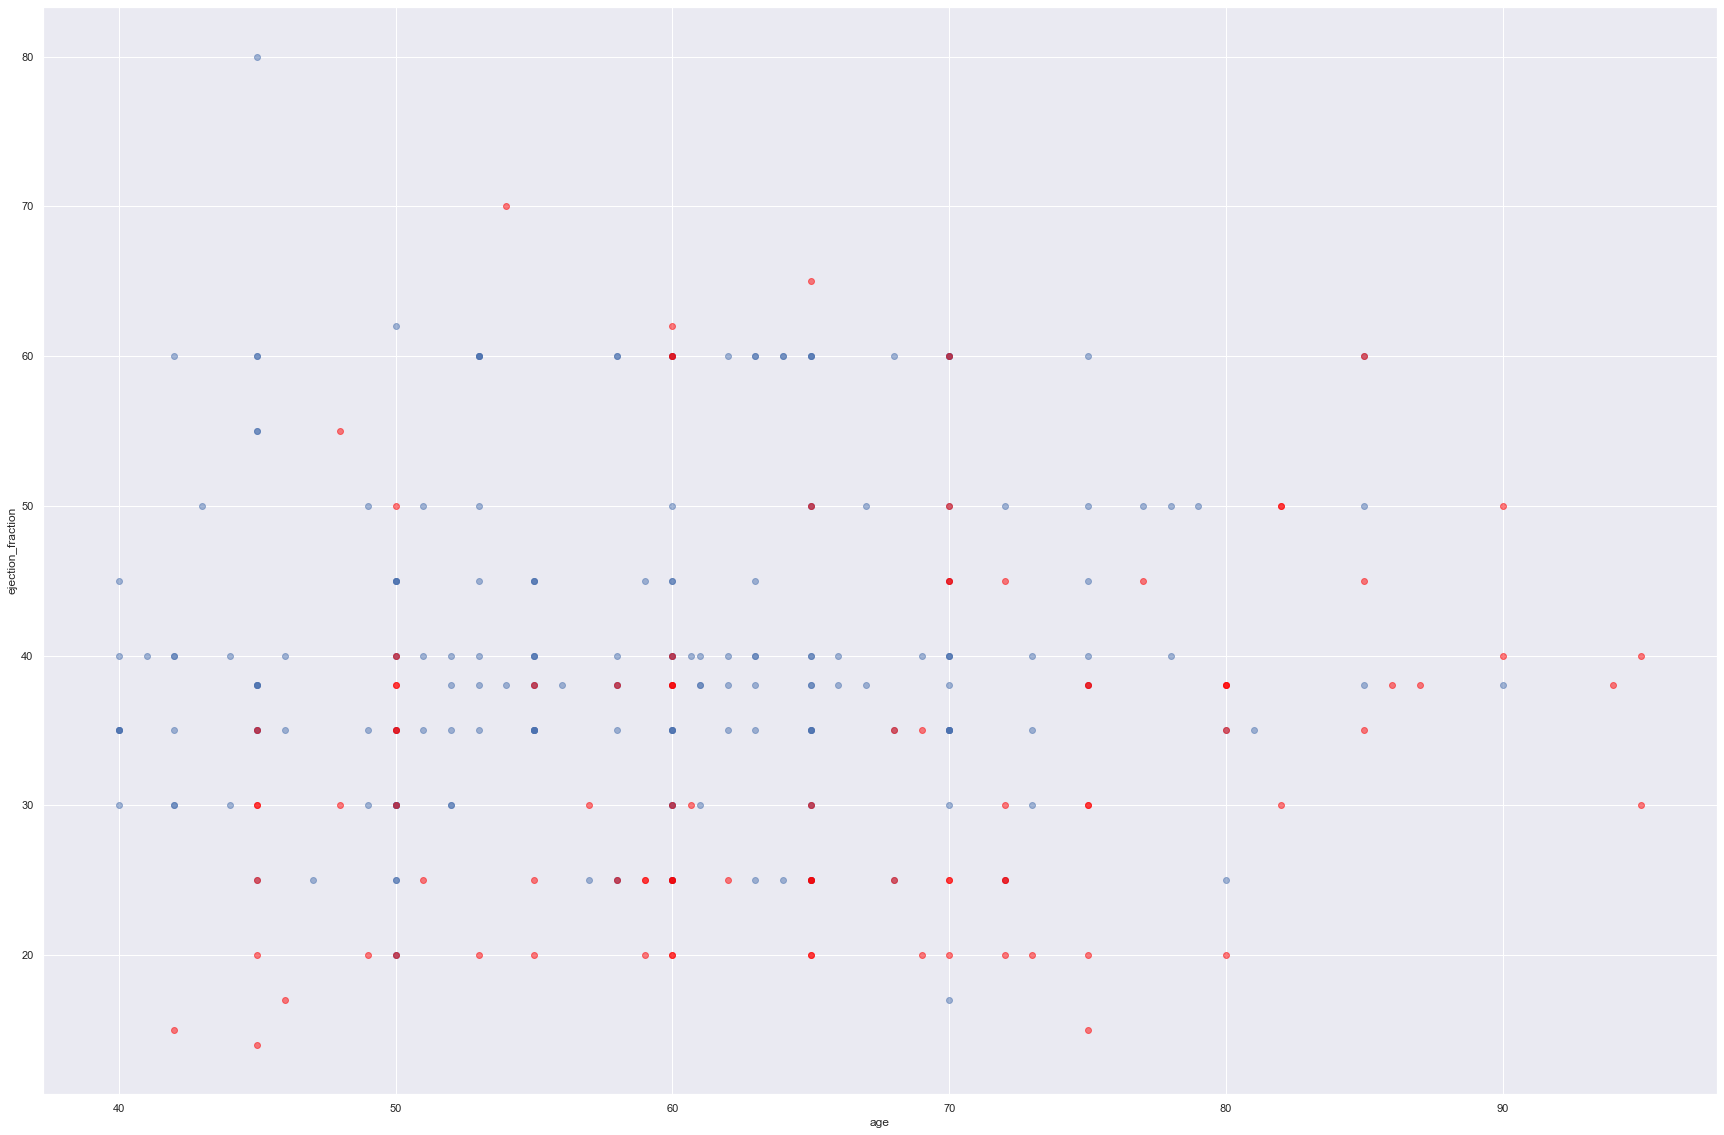

In [15]:
sns.set(style = "darkgrid")
fig = plt.figure()
ax = plt.axes()

ax.set_xlabel("age")
ax.set_ylabel("ejection_fraction")
#ax.set_zlabel("Ejection Infartion")

plt.scatter(Alive['age'], Alive['ejection_fraction'], label = "Alive people", alpha = 0.5)
plt.scatter(Death['age'], Death['ejection_fraction'],  label = "Death people", color = 'red', alpha = 0.5)

#ax.scatter(Alive['age'],  Alive['DEATH_EVENT'], Alive['ejection_fraction'], 'o', label = "Alive people")
#ax.scatter(Death['age'], Death['DEATH_EVENT'], Death['ejection_fraction'],  'o', label = "Death people", color = 'red')
plt.show()

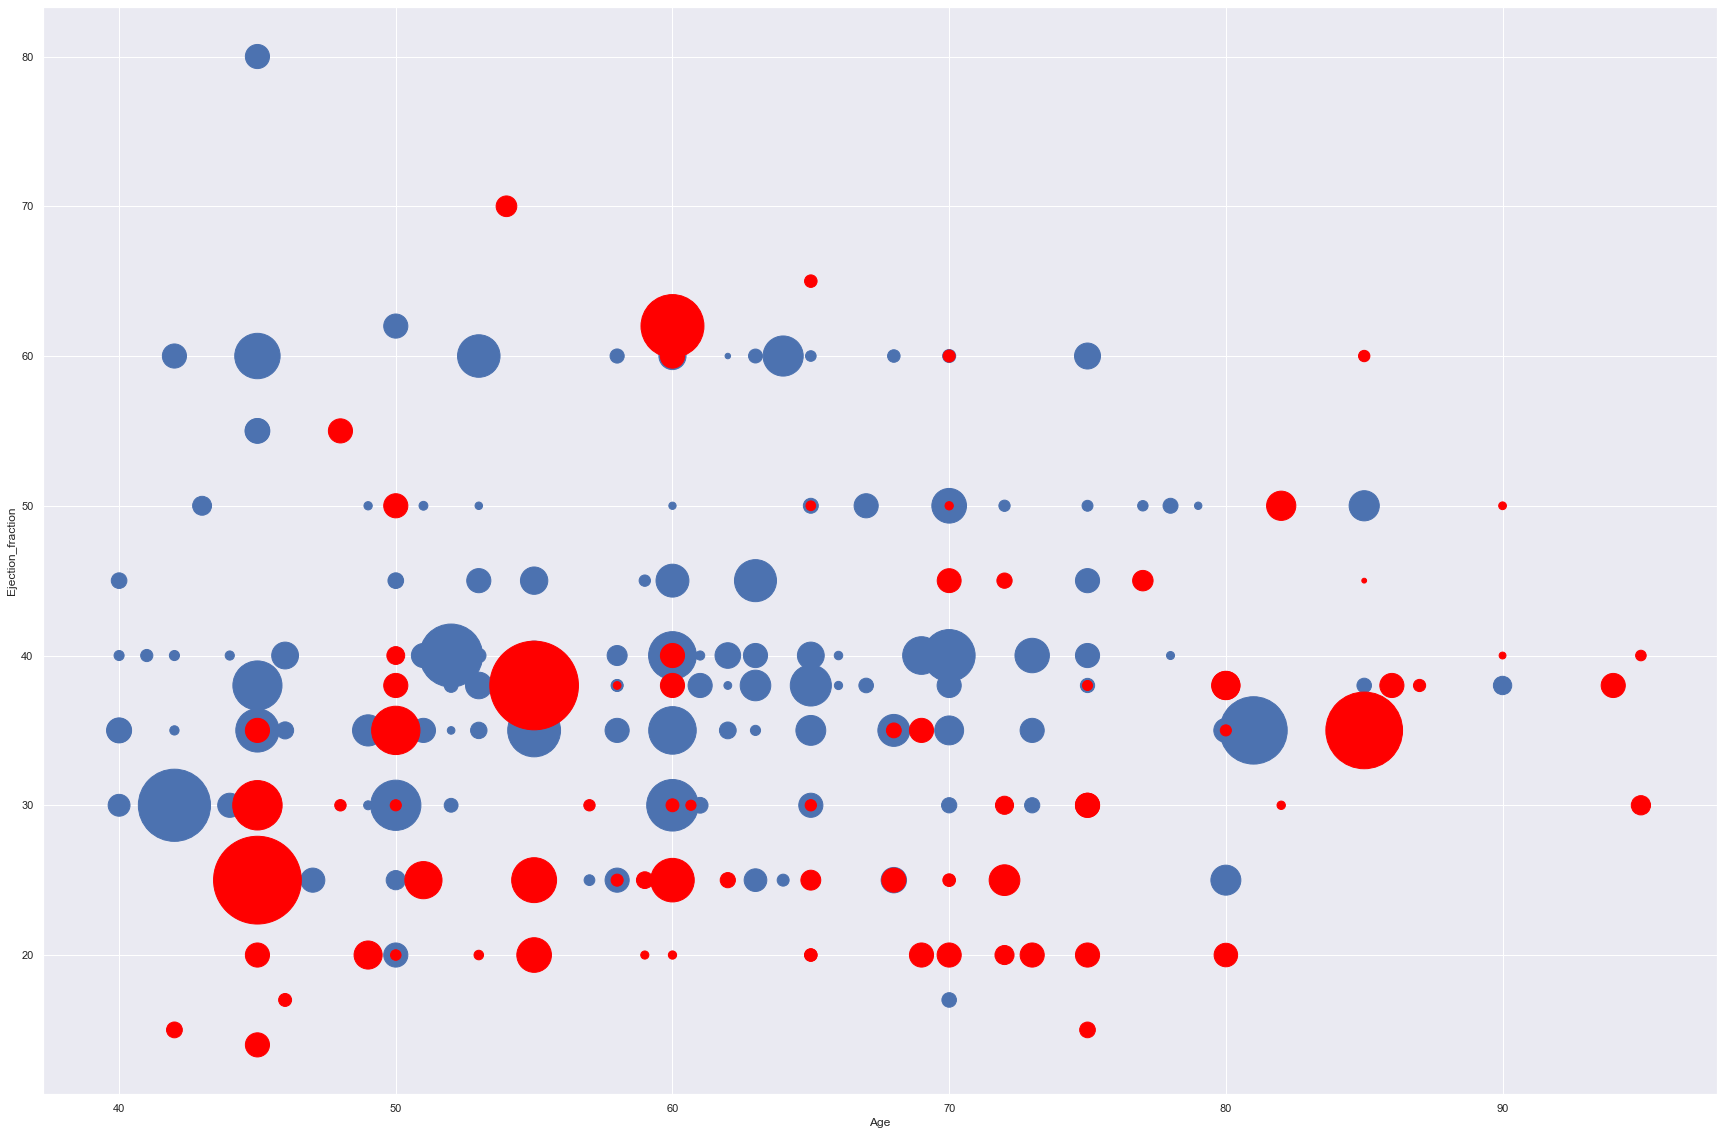

In [16]:
fig = plt.figure()
ax = plt.axes()

ax.set_xlabel("Age")
ax.set_ylabel("Ejection_fraction")

ax.scatter(Alive['age'],  Alive['ejection_fraction'], Alive['creatinine_phosphokinase'],  label = "Alive people")
ax.scatter(Death['age'], Death['ejection_fraction'], Death['creatinine_phosphokinase'], label = "Death people", color = 'red')

plt.show()

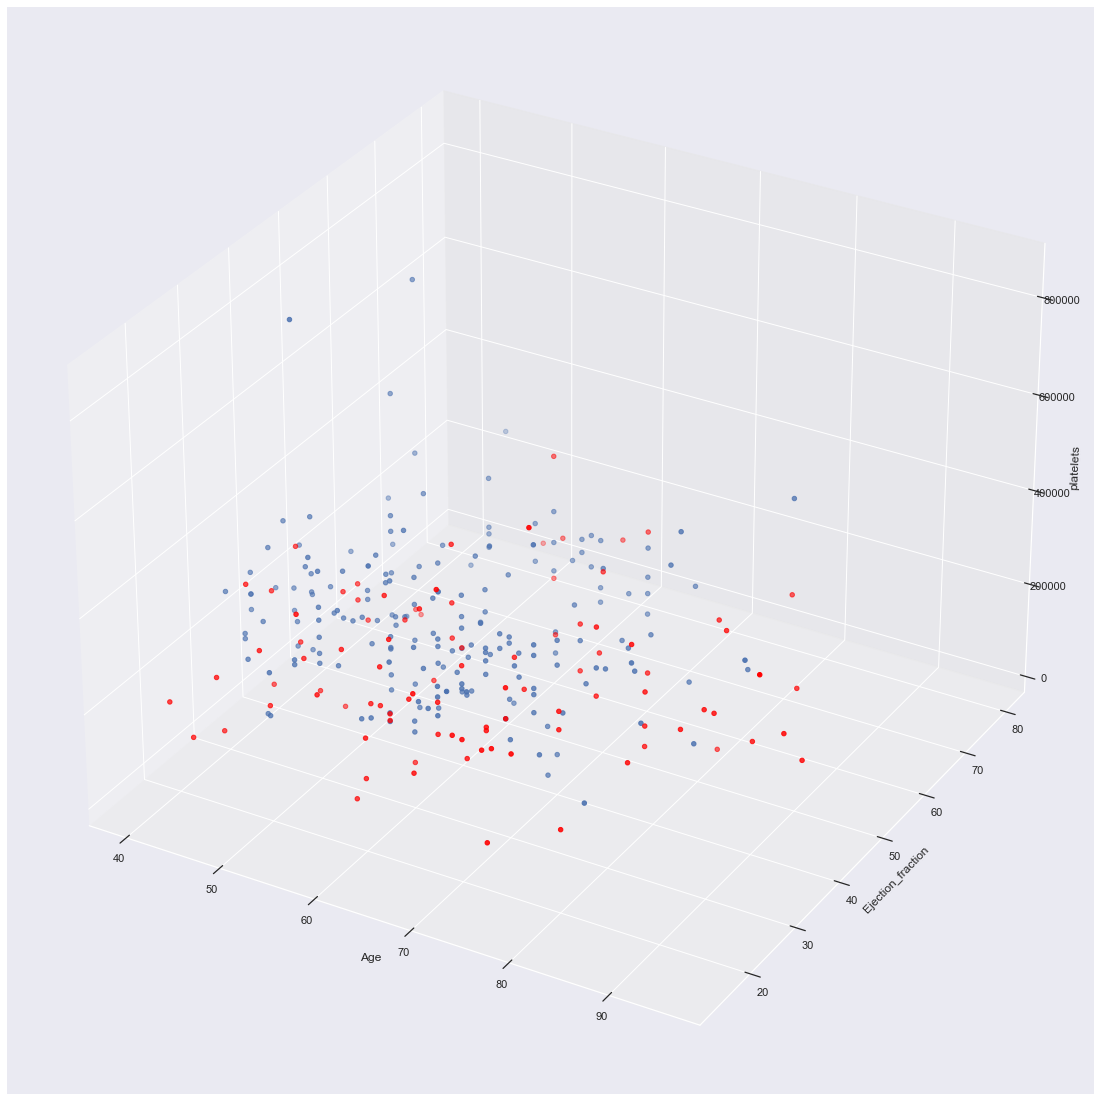

In [17]:
sns.set(style = "darkgrid")
fig = plt.figure()
ax = plt.axes(projection="3d")

ax.set_xlabel("Age")
ax.set_ylabel("Ejection_fraction")
ax.set_zlabel("platelets")

ax.scatter(Alive['age'],  Alive['ejection_fraction'], Alive['platelets'], 'o', label = "Alive people")
ax.scatter(Death['age'], Death['ejection_fraction'], Death['platelets'],  'o', label = "Death people", color = 'red')
plt.show()

In [311]:
# All data is not in categorical and machine learning models can use the data as numbers
# models possible Linear, Categorical, and random forest Tree model
# Trying brute force for quicknest and more advance methods only if required

from sklearn.linear_model import LinearRegression, Perceptron
from sklearn.ensemble import RandomForestRegressor, AdaBoostClassifier

from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError
from sklearn.model_selection import train_test_split

columns = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking']

targetDataFrame = heartFailure[columnsTarget]

pre_score = 0
for state in range(0, 10):
    # split the data
    print("random_state: ", state)
    X_train, X_test, y_train, y_test = train_test_split(targetDataFrame, heartFailure["DEATH_EVENT"], train_size=0.80, random_state = state)

    # Instantiate the linear model and visualizer
    model = RandomForestRegressor()
    visualizer = PredictionError(model)

    visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
    score = visualizer.score(X_test, y_test)
    print(score)  # Evaluate the model on the test data
    if(score > pre_score):
        pre_score = score
        best_state = state
#visualizer.show()                 # Finalize and render the figure

random_state:  0
0.06635221975746841
random_state:  1
0.021491275623171657
random_state:  2
0.16790251915236354
random_state:  3
0.0993926072314344
random_state:  4
-0.20492288281303117
random_state:  5
-0.037234718187016735
random_state:  6
0.23363008305237554
random_state:  7
0.3248633891497419
random_state:  8
0.1430985198730652
random_state:  9
0.06656346340387997


In [312]:
best_state

7

In [315]:
# Creating machine learnning model for prediction of data.
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import  ExtraTreesClassifier

X_train, X_test, y_train, y_test = train_test_split(targetDataFrame, heartFailure["DEATH_EVENT"], train_size=0.80, random_state = best_state)

model2 = ExtraTreesClassifier()
model2.fit(X_train, y_train)

kfold = KFold(random_state=30, shuffle=True)
results = cross_val_score(model2, X_train, y_train, cv=kfold)
print(model2.score(X_train, y_train))
print(results.mean(), results.std())

# printing error and statistical data to understand model
from sklearn.metrics import mean_squared_error

print("Correct: ", model2.score(X_test, y_test))
y_pred = model2.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0), "\n") 

0.9330543933054394
0.6403368794326241 0.02868233207447963
Correct:  0.8333333333333334
MSE:  0.16666666666666666
RMSE:  0.08333333333333333 



In [316]:
from sklearn.ensemble import RandomForestClassifier


# split the data
print("random_state: ", state)
X_train, X_test, y_train, y_test = train_test_split(targetDataFrame, heartFailure["DEATH_EVENT"], train_size=0.80, random_state = best_state)

model3 = RandomForestClassifier()
model3.fit(X_train, y_train)

kfold = KFold(random_state=30, shuffle=True)
results = cross_val_score(model3, X_train, y_train, cv=kfold)
print(model3.score(X_train, y_train))
print(results.mean(), results.std())

# printing error and statistical data to understand model
from sklearn.metrics import mean_squared_error

print("Correct: ", model3.score(X_test, y_test))
y_pred = model3.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0), "\n") 

random_state:  9
0.9330543933054394
0.6486702127659575 0.031913169772199226
Correct:  0.85
MSE:  0.15
RMSE:  0.075 

